<a href="https://colab.research.google.com/github/cyrilgabriele/MLDM/blob/main/Kopie_von_L04_Polynomial_and_Logistic_Regression_LAB_ASSIGNMENT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [ ]:
RANDOM_SEED = 0x0

# TASK 1: Polynomial Regression (5 Points): 

Let's create and explore the data.

In [ ]:
# set the random seed to an RANDOM_SEED, so that everyone has the same data to work with
np.random.seed(seed=RANDOM_SEED)
# create predictor variable, that have standard normal distribution and reshape it in order to use for the model training
x = np.random.normal(0, 1, 100).reshape(-1, 1)
# create target variable
y = 3*x**3 + 2*x**2 + x + np.random.normal(0, 10, 100).reshape(-1, 1)

Visualise the data

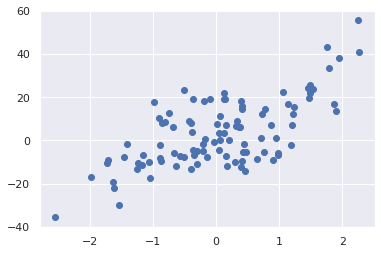

In [ ]:
plt.scatter(x, y)
plt.show()

## Task 1a
Apply Linear Regression on the data


1. Split the data in the train and test set (80/20), set `random_state` to `RANDOM_SEED`.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=RANDOM_SEED)

2. Apply Linear Regression on the data and predict `y` values for training as well test data 

In [ ]:
from sklearn.linear_model import LinearRegression 
linearRegression = LinearRegression()

linearRegression.fit(X_train, y_train)

y_train_pred = linearRegression.predict(X_train)
y_test_pred = linearRegression.predict(X_test)

print("y train prediction =", y_train_pred)
print("y test prediction = ", y_test_pred)

y train prediction = [[ 24.8105505 ]
 [ -5.20409199]
 [ 27.96106747]
 [  5.02690375]
 [ -1.1310202 ]
 [-13.89980582]
 [ 13.94364999]
 [  7.99160103]
 [  8.683055  ]
 [ -5.83014814]
 [ -3.67632257]
 [ -9.02665362]
 [ -0.75205446]
 [ -6.22653091]
 [  7.82776611]
 [  1.59350968]
 [  7.02596155]
 [  4.34856133]
 [-15.12024136]
 [  7.99542656]
 [  7.97170485]
 [ -0.27832457]
 [-14.90291777]
 [-11.79437851]
 [ 23.90685605]
 [  7.24973797]
 [  1.39831761]
 [ -7.76047681]
 [ -0.57993093]
 [ -6.98646928]
 [ 16.9012908 ]
 [ -0.31294451]
 [ 22.78284269]
 [ -0.15190969]
 [ 20.27134592]
 [ -6.09804415]
 [ 19.41881787]
 [  5.32408382]
 [ -4.43327521]
 [ -1.92083638]
 [  5.19045409]
 [  7.73285484]
 [-14.07682012]
 [  6.91089705]
 [  4.23614571]
 [ 24.21451687]
 [ -6.01463481]
 [ 19.7878074 ]
 [  8.44632781]
 [ 15.07697712]
 [ -5.64878018]
 [ 19.58263539]
 [  1.31598115]
 [ 23.01977556]
 [  5.00441582]
 [  4.19031945]
 [-24.097819  ]
 [  7.49616115]
 [ 15.99947525]
 [ -2.65976186]
 [-12.16737571]
 [ 


```
# Als Code formatiert
```

3. Calculate MSE for training as well as for test data.

In [ ]:
from sklearn.metrics import mean_squared_error

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print(f"MSE of training data: {mse_train}")
print(f"MSE of test data: {mse_test}")

MSE of training data: 131.3354142667106
MSE of test data: 135.783818600193


4. Visualize the model's artefacts: Plot all the data as well as Linear Regression predictions for training and test data in a scatter plot. Don't forget a legend to differentiate the data.

In [ ]:
def plot_artefacts(X_train, X_test, y_train, y_test, y_train_pred, y_test_pred):
    # plot the original data points
    plt.scatter(X_train, y_train, label='Training Data')
    plt.scatter(X_test, y_test, label='Test Data')

    # plot the predicted values for the training and test data
    plt.scatter(X_train, y_train_pred, label='Training Predictions')
    plt.scatter(X_test, y_test_pred, label='Test Predictions')

    # add labels and a legend
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()

    # show the plot
    plt.show()

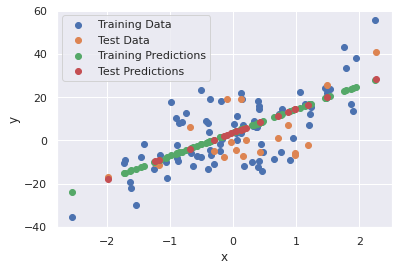

In [ ]:
plot_artefacts(X_train, X_test, y_train, y_test, y_train_pred, y_test_pred)

## Task 1b
Investigate how well polynomial regression with polynomial degrees = 2 can solve the task. In order to do so, follow these steps:
1. Transform the training and test data accordingly to describe polynomial distribution of degree=2
2. Train a Linear Regression model on polynomial data
3. Make predictions for training data
4. Make predictions for test data
5. Calculate MSE for training as well as test data

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

def poly_regression(X_train, X_test, degree):
    # transform the training and test data into polynomial features of degree=2
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.fit_transform(X_test)

    # create a linear regression object
    lr_poly = LinearRegression()

    # fit the linear regression model to the training data
    lr_poly.fit(X_train_poly, y_train)

    # make predictions on the polynomial training and test data
    y_pred_train_poly = lr_poly.predict(X_train_poly)
    y_pred_test_poly = lr_poly.predict(X_test_poly)

    #calculate the mse 
    mse_train_poly = mean_squared_error(y_train, y_pred_train_poly)
    mse_test_poly = mean_squared_error(y_test, y_pred_test_poly)

    return y_pred_train_poly, y_pred_test_poly, mse_train_poly, mse_test_poly

In [ ]:
y_pred_train_poly, y_pred_test_poly, mse_train_poly, mse_test_poly = poly_regression(y_train_pred, y_test_pred, 2)
print(f"MSE of training data: {mse_train_poly}")
print(f"MSE of test data: {mse_test_poly}")

MSE of training data: 129.64199704420648
MSE of test data: 128.69895330783694


6. Did it perform better than Linear Regression? Visualize the results similar to **Task 1a) 4**.

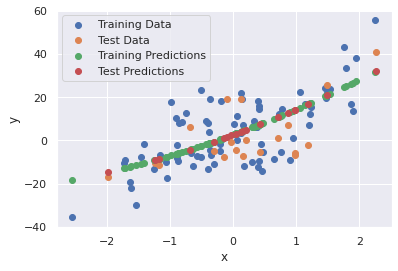

In [ ]:
# It did perform much better (1.69 -> 2d Polynom // 131.34 -> linear regression
# (1d) if we consider only the MSE number but the plots looks quite same...
  
# plot the original data points
plt.scatter(X_train, y_train, label='Training Data')
plt.scatter(X_test, y_test, label='Test Data')

# plot the predicted values for the training and test data
plt.scatter(X_train, y_pred_train_poly, label='Training Predictions')
plt.scatter(X_test, y_pred_test_poly, label='Test Predictions')

# add labels and a legend
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

# show the plot
plt.show()

## Task 1c
Investigate the influence of polynomial degrees on the results. Consider degrees in `range(0, 11)`. Visualize the results similar to **Task 1a) 4** and plot MSE (on training as well as test data) as a function of the number of the polynomial degrees. 

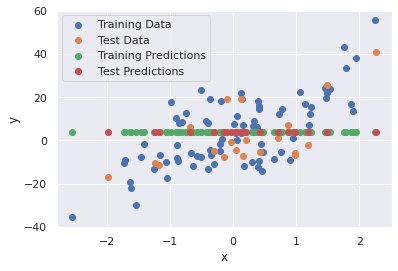

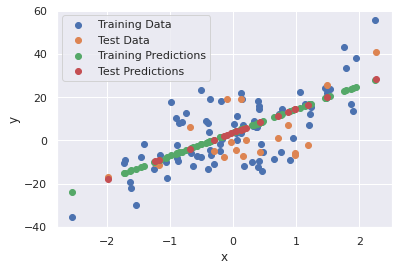

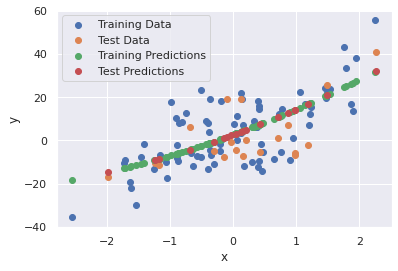

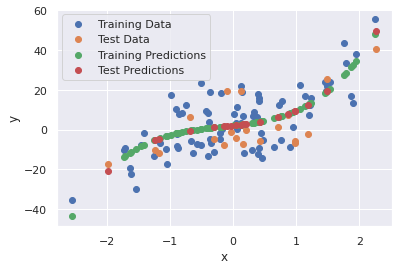

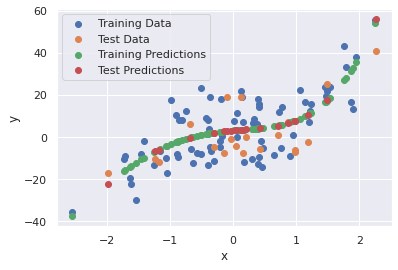

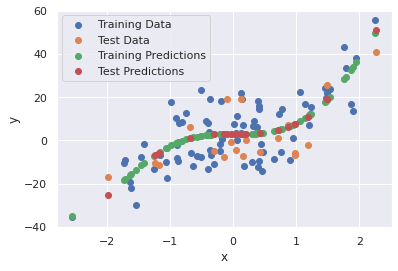

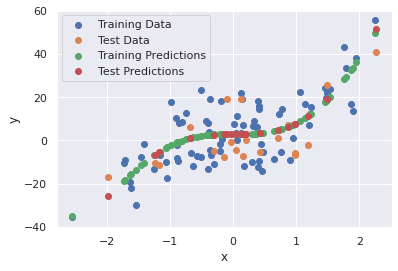

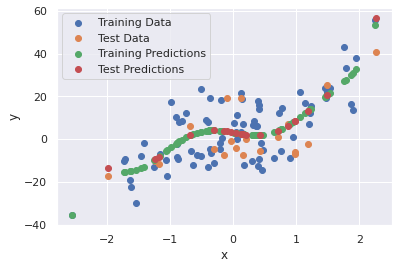

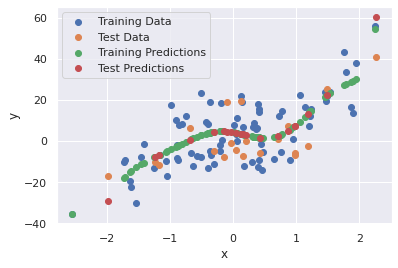

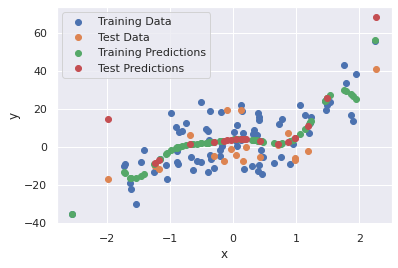

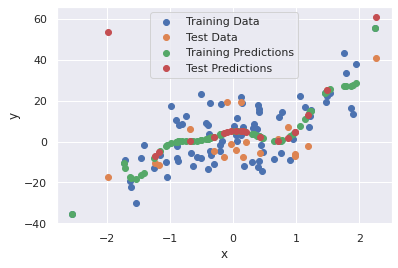

Print out of mses_test_poly: [10, 199.3464641016471, 135.783818600193, 128.69895330783694, 96.96794313055854, 99.05556112799887, 91.46352858839495, 92.6187739368601, 98.94463373204862, 109.65998133182327, 161.38527545625456, 349.1825949940909]
Print out of mses_train_poly: [10, 252.5590649070403, 131.3354142667106, 129.64199704420648, 107.95218526581712, 105.67902403745693, 104.44086502216433, 104.43485364972112, 102.12974684477726, 100.93920532650927, 97.08026571334578, 95.86018282182269]


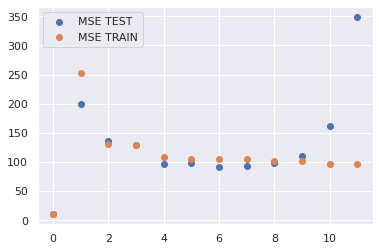

In [ ]:
mses_test_poly = [10]
mses_train_poly = [10]

for i in range(0, 11):
  y_pred_train_poly, y_pred_test_poly, mse_train_poly, mse_test_poly = poly_regression(y_train_pred, y_test_pred, i)
  plot_artefacts(X_train, X_test, y_train, y_test, y_pred_train_poly, y_pred_test_poly)
  mses_train_poly.append(mse_train_poly)
  mses_test_poly.append(mse_test_poly)
  

print("Print out of mses_test_poly:", mses_test_poly)
print("Print out of mses_train_poly:", mses_train_poly)

plt.scatter(np.arange(0, 12), mses_test_poly, label="MSE TEST")
plt.scatter(np.arange(0, 12), mses_train_poly, label="MSE TRAIN")
plt.legend()
plt.show()

# The optimal degree is at: Degree 5!

## 📢 **HAND-IN** 📢: Answer following questions in Moodle:

What is the optimal value of the polynomial degrees? Do the values of MSE training and MSE test behave similarly? How do the models behave with polynomial degrees >= 8? 

# Task 2: Polynomial Data Transformation (1 Point)

As we have seen in the lecture, Polynomial Regression is nothing other than a generalization of Linear Regression. Every polynomial Regression can be expressed as a Multivariate Linear Regression. Only transformation of the initial data has to be done.

 $h_\theta(a) = \theta_0 + \theta_1a_1 +\theta_2a_2 $, where
 $ a_0 = v^0, a_1 = v^1, a_2 = v^2 $

In Task 1 `sklearn.preprocessing.PolynomialFeatures` transformed the X data for us. But in order to understand what exactly it is done to the data, in this task we transform an initial data array $v$ to 
the form $(a_1...a_n)$ that can be used to build a Polynomial Regression model with polynomial degrees=2 by hand (without using `sklearn.preprocessing.PolynomialFeatures`). Please transform the array $v$ and insert your answer in Moodle.

\begin{align}
v=
\begin{bmatrix}
3 \\
2 \\
0 \\
\end{bmatrix}
\end{align}

Polynom = theta0 + theta1

In [ ]:
from sklearn.preprocessing import PolynomialFeatures 
poly = PolynomialFeatures(2)
print(poly.fit_transform(np.array([[3, 2, 0]])))

[[1. 3. 2. 0. 9. 6. 0. 4. 0. 0.]]


## 📢 **HAND-IN** 📢: Write your answer in Moodle

# Task 3: Logistic Regression (4 Points)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from random import randrange
import seaborn as sns
sns.set()

## Task 3a. Data Exploration and Preprocessing

We are using the Fashion MNIST Dataset from Zalando. 
Firstly, we load and explore the dataset.



In [ ]:
from keras.datasets import fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
print(X_train.shape)
print(y_train.shape)
print(X_train.dtype)
print(y_train.dtype)

(60000, 28, 28)
(60000,)
uint8
uint8


In [ ]:
label_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In following task we will only use training part of the dataset.

#### Prepare data 
1. assign following datatypes to the arrays:
   - X_train -> 'float32'
   - y_train -> 'int64'
2. reshape X_train to 2-dimensional array. 
Note: 
   - it should have the same amount of samples/rows.
3. split the training data into (X_train, y_train) and (X_valid, y_valid), set the size of the validation dataset to 20% of the training data and set random state = 42.

In [ ]:
X_train = np.array(X_train, dtype='float32')
y_train = np.array(y_train, dtype='int64')

# Reshape X_train to 2-dimensional array
# rename X_Train damit 2D Array NUR für Bild print verwendet wird damit clf unten wieder geht!
X_train = X_train.reshape(-1, 28, 28)
print(X_train.shape)

# Split the training data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

(60000, 28, 28)


#### Visualize some data 
Plot 25 images (hint: use ``imshow`` and ``subplots`` from matplotlib library), plot the label as title (e.g. shorts).

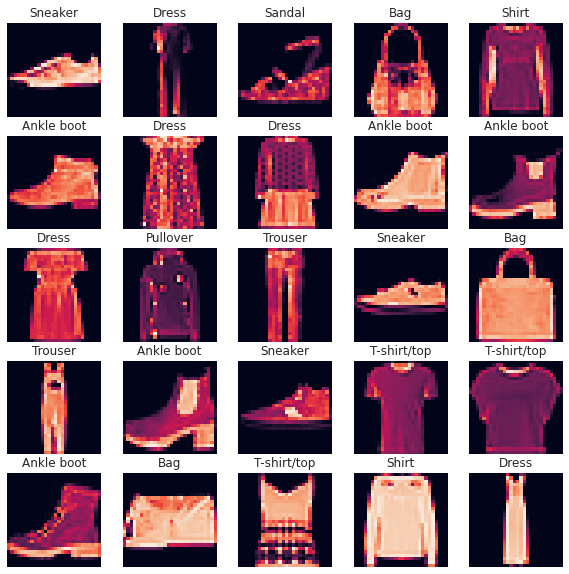

In [ ]:
# Plot 25 images with their corresponding labels
fig, axs = plt.subplots(5, 5, figsize=(10, 10))
for i in range(5):
    for j in range(5):
        index = i * 5 + j
        axs[i, j].imshow(X_train[index])
        axs[i, j].set_title(label_names[y_train[index]])
        axs[i, j].axis('off')
plt.show()

#### Normalize the Images
With mean and standard deviation

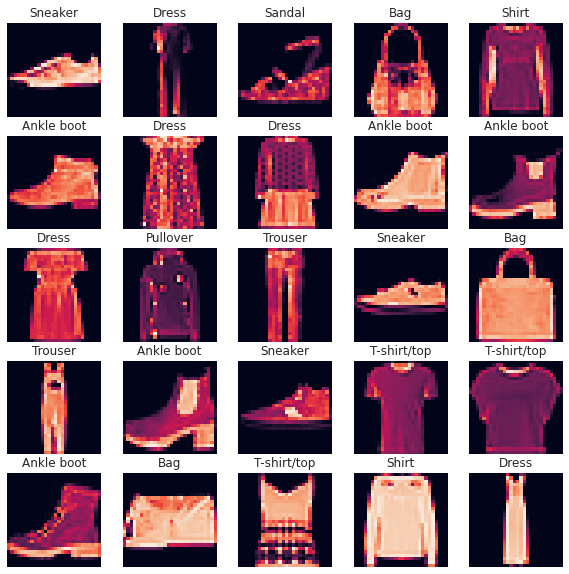

In [ ]:
# Calculate mean and standard deviation of training set
meanX = X_train.mean()
stdX = X_train.std()

# Normalize training set: X
X_train = (X_train - meanX) / stdX

fig, axs = plt.subplots(5, 5, figsize=(10, 10))
mean = X_train.mean()
for i in range(5):
    for j in range(5):
        index = i * 5 + j
        axs[i, j].imshow(X_train[index])
        axs[i, j].set_title(label_names[y_train[index]])
        axs[i, j].axis('off')
plt.show()

## Task 3b. Logistic Regression
1. Fit the `LogisticRegression` from `scikit-learn`. Set the `random_state` for reproducibility.
2. Try different parameters (either by hand or by using `GridSearchCV`)


**Accuracy should be >= 0.84**

Please, check the documentation on:
GridSearchCV: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

PredefinedSplit: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.PredefinedSplit.html

You can ignore a warning "STOP: TOTAL NO. of ITERATIONS REACHED LIMIT." as long as GridSearchCV continues with the next hyperparameter and you reach the necessary accuracy.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import PredefinedSplit
from sklearn.linear_model import LogisticRegression

# We use predefined split in order to control that no train samples would be used in validation step


solver_all = ['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga']
max_iter_all = [5,10,15]
scores = []

for solver in solver_all:
  for max_iter in max_iter_all:
    #Geht ewig zu berechnen, deshalb kommentiere ichs erstamal aus
    clf = LogisticRegression(random_state=RANDOM_SEED, max_iter=max_iter, C = 1.5, solver=solver).fit(X_train, y_train)
    score = clf.score(X_train, y_train)
    scores.append((score, max_iter, solver))

for score, max_iters, solver in scores:
  print(f"{score} for max_iters={max_iters} and solver={solver}")

#0.8827291666666667 for max_iter=15 and solver=newton-cg ist am besten bei mir gewesen.



/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

KeyboardInterrupt: ignored

Use the best found parameters for the next steps. `GridSearchCV` provides them in the `best_params_` attribute.

3. Create a new `LogisticRegression` instance with the best found parameters.
4. Fit it on the training set.
5. Calculate the accuracy on the validation set.

In [ ]:
from sklearn.metrics import accuracy_score
X_train = X_train.reshape(X_train.shape[0], -1)
X_valid = X_valid.reshape(X_valid.shape[0], -1)
# y_train = y_train.reshape(y_train.shape[0], -1)
clf = LogisticRegression(random_state=RANDOM_SEED, max_iter=15, C = 1.5, solver='newton-cg').fit(X_train, y_train)
y_pred = clf.predict(X_valid)
accuracy = accuracy_score(y_valid, y_pred)
print("Genauigkeit: ",accuracy)
...

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Genauigkeit:  0.7324166666666667


/usr/local/lib/python3.9/dist-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


Ellipsis

## 📢 **HAND-IN** 📢: Report in Moodle the accuracy you got in this task.